# **Task 2: Training from scratch: pointclouds**

In [4]:
# necessary imports
import os
import numpy
import pandas
import random
import trimesh
import logging
import tensorflow
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import models, layers, regularizers, optimizers
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization

# import Stratified K-Fold Cross Validation notebook
%run KFold-Cross-Validation.ipynb

# dataset root path
DATASET_ROOT = '/run/media/rr/M2/DevOps/jupyter-lab/CIDL/dataset/'

# final preprocessed dataset directory path
DATASET_PATH = os.path.join(DATASET_ROOT, 'Preprocessed')

# number of classes for the classification task
NUM_CLASSES = 5

In [5]:
# only log critical messages
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

## Experiment 0 - Naive Model

Found 394 validated pointcloud filenames belonging to 5 classes.

-------- STARTING FOLD: 1 --------
Found 2947 validated pointcloud filenames belonging to 5 classes.
Found 590 validated pointcloud filenames belonging to 5 classes.
Model: "Experiment-0-1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                  

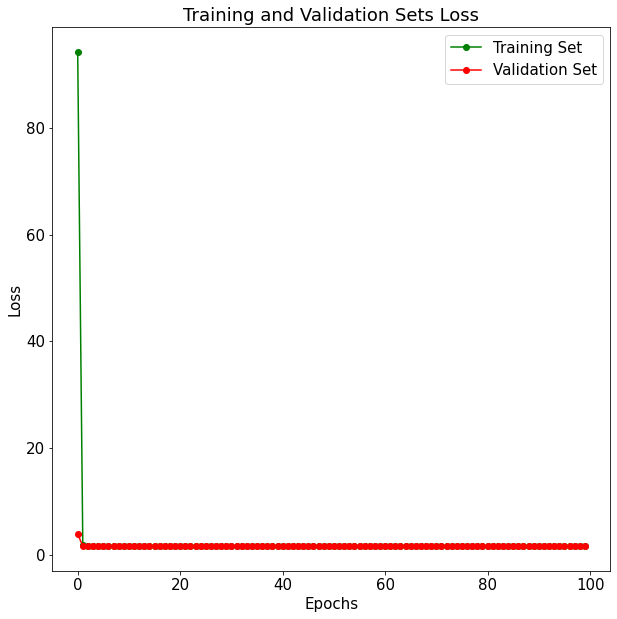

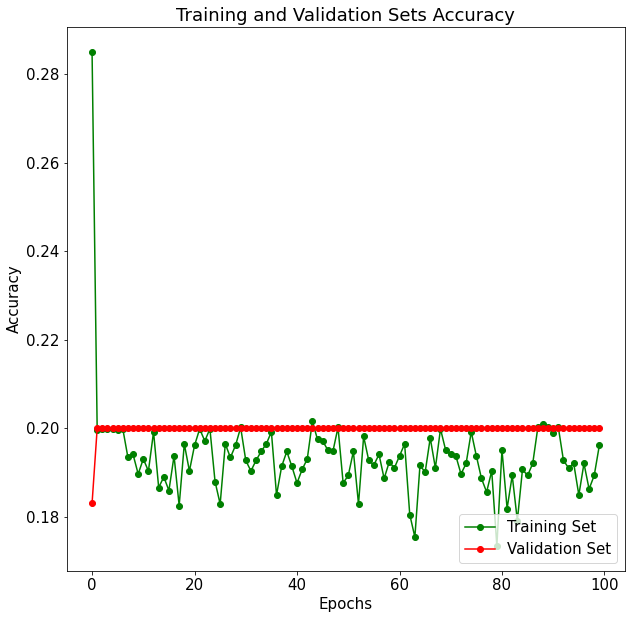

13/13 [==============================] - 0s 1ms/step - loss: 1.6094 - sparse_categorical_accuracy: 0.1980
Best model Test Loss: 1.6094428300857544
Best model Test Accuracy: 0.19796954095363617
Confusion Matrix
Normalized confusion matrix


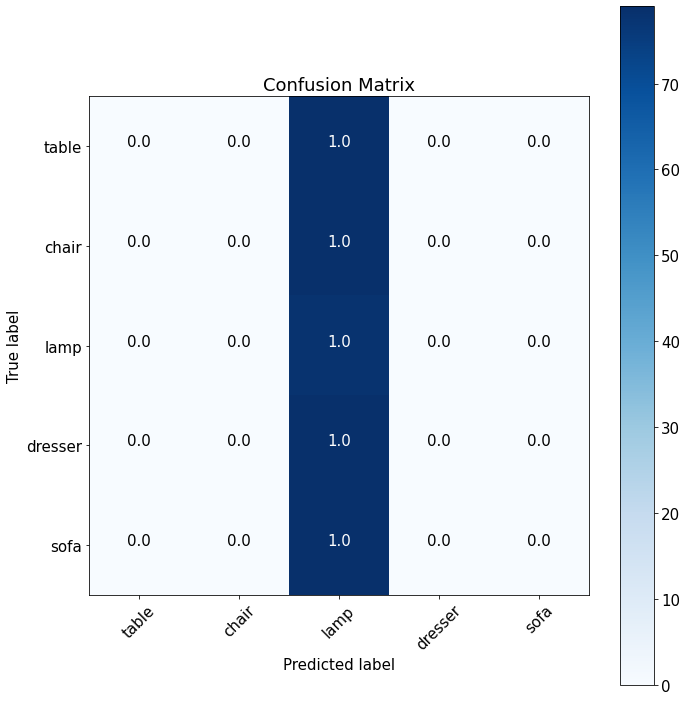

Classification Report
              precision    recall  f1-score   support

       table       0.00      0.00      0.00        79
       chair       0.00      0.00      0.00        79
        lamp       0.20      1.00      0.33        78
     dresser       0.00      0.00      0.00        79
        sofa       0.00      0.00      0.00        79

    accuracy                           0.20       394
   macro avg       0.04      0.20      0.07       394
weighted avg       0.04      0.20      0.07       394


-------- TERMINATED FOLD: 1 --------


/run/media/rr/M2/DevOps/jupyter-lab/python39_venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/run/media/rr/M2/DevOps/jupyter-lab/python39_venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/run/media/rr/M2/DevOps/jupyter-lab/python39_venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [6]:
# experiment model layers
layers = [
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(32),
    Activation('relu'),
    Dense(NUM_CLASSES, activation='softmax')
]

# train, validate and test
pointclouds_kfold_validation_conv2d(model_name="Experiment-0", n_splits=6, test_size=0.10,
                        shuffle=True, layers=layers, learning_rate=0.001,
                        decay=1e-6, target_size=4096, epochs=100,
                        batch_size=32, one_fold=True, resample_data=0)

## Experiment 1 - Model

In [ ]:
# testing
layers = [
    Conv1D(32, 3, activation='relu', input_shape=(4096, 3)),
    MaxPooling1D(pool_size=2),
    Conv1D(32, 3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(32),
    Activation('relu'),
    Dense(NUM_CLASSES, activation='softmax')
]

# train, validate and test
pointclouds_kfold_validation(model_name="Experiment-1", n_splits=6, test_size=0.10,
                        shuffle=True, layers=layers, learning_rate=0.001,
                        decay=1e-6, target_size=4096, epochs=100,
                        batch_size=32, one_fold=True, resample_data=0)

## Experiment 2 - Model

## Experiment 3 - Model

## Experiment 4 - Model